# Multiple Layer LSTM (IMDB Suwbwords 8k vocabulary)

In [10]:
!pip install tensorflow==2.0.0
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0


In [11]:
# fix for Cuda Memory Growth issue
#physical_devices = physical_devices = tf.config.experimental.list_physical_devices(device_type='GPU')
#try:
#  tf.config.experimental.set_memory_growth(physical_devices[0], True)
#except:
#  # Invalid device or cannot modify virtual devices once initialized.
#  pass

In [12]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [13]:
tokenizer = info.features['text'].encoder

In [14]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
#train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
#test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
NUM_EPOCHS = 2
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/2
391/391 [==============================] - 1964s 5s/step - loss: 0.6786 - accuracy: 0.5670 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2
391/391 [==============================] - 2000s 5s/step - loss: 0.5952 - accuracy: 0.6851 - val_loss: 0.5937 - val_accuracy: 0.7396


In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

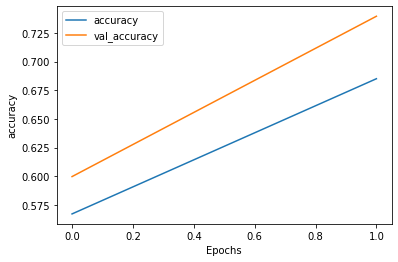

In [20]:
plot_graphs(history, 'accuracy')

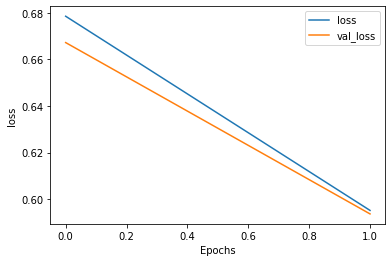

In [21]:
plot_graphs(history, 'loss')

In [22]:
model.save('DoubleLSTM_10epochs_model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: DoubleLSTM_10epochs_model/assets


INFO:tensorflow:Assets written to: DoubleLSTM_10epochs_model/assets
